In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import resultcomp
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
directories= ['baseline', 'exploration_only', 'zipf', 'zipf_and_dist']

In [12]:
snational, seast, swest = resultcomp.read_results(directories=directories)

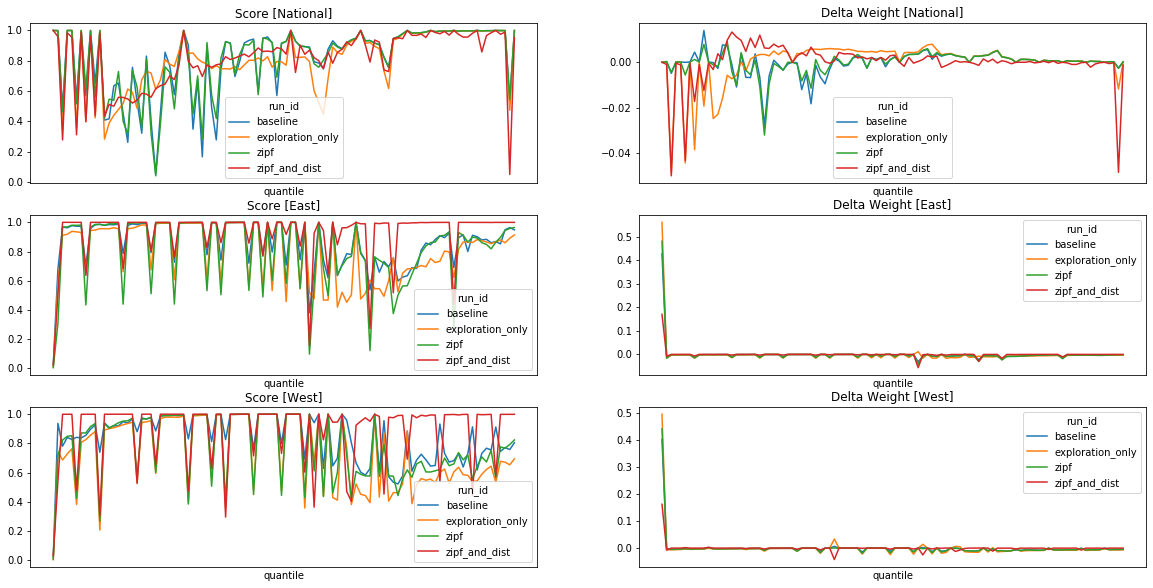

In [13]:
_ = resultcomp.plot_scores(snational, seast, swest)

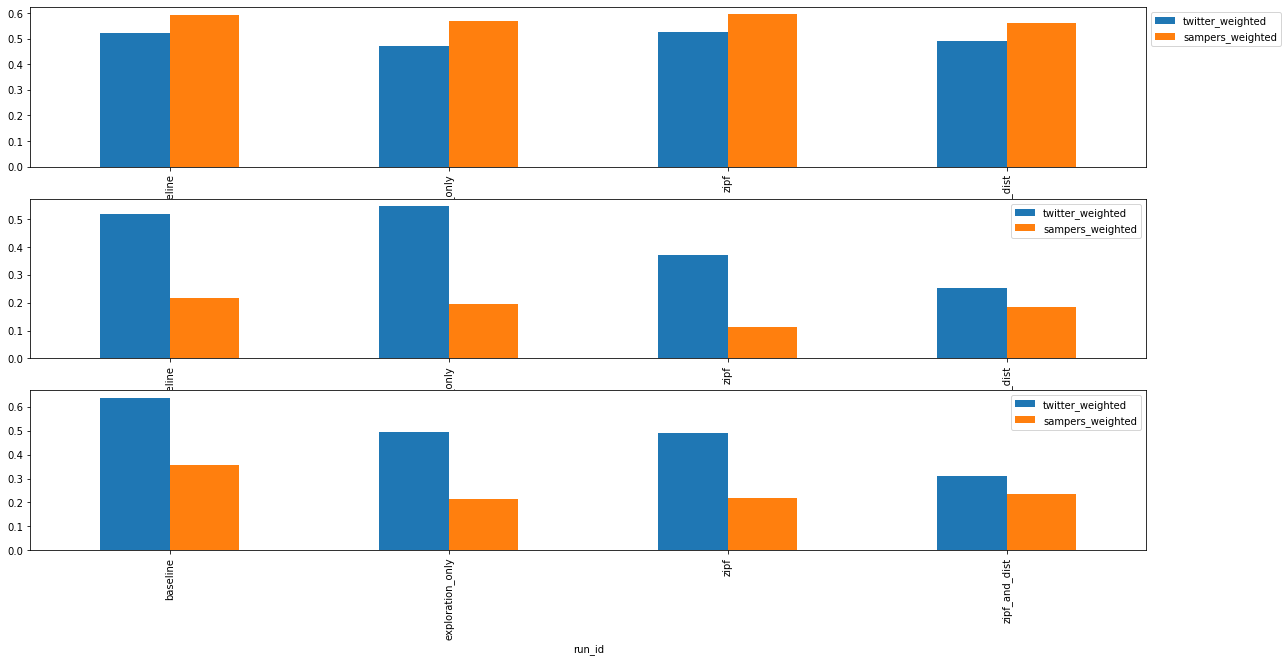

In [14]:
_ = resultcomp.plot_score_summary(snational, seast, swest)

In [15]:
seast

,,score,sampers_weight,twitter_weight
quantile,run_id,,,
"(-0.001, 3.211]",baseline,0.024247,6.803014e-01,0.254157
"(3.211, 5.192]",baseline,0.381394,7.105888e-02,0.102643
"(5.192, 6.939]",baseline,0.537589,4.137872e-02,0.063680
"(6.939, 8.647]",baseline,0.753912,2.712395e-02,0.044160
"(8.647, 10.313]",baseline,0.690017,2.320578e-02,0.035396
...,...,...,...,...
"(277.455, 291.861]",zipf_and_dist,0.999986,2.727059e-07,0.000022
"(291.861, 312.377]",zipf_and_dist,0.999968,1.784666e-07,0.000037
"(312.377, 348.792]",zipf_and_dist,0.999960,7.081628e-08,0.000046


In [16]:
dms = resultcomp.read_distance_metrics(directories=directories)

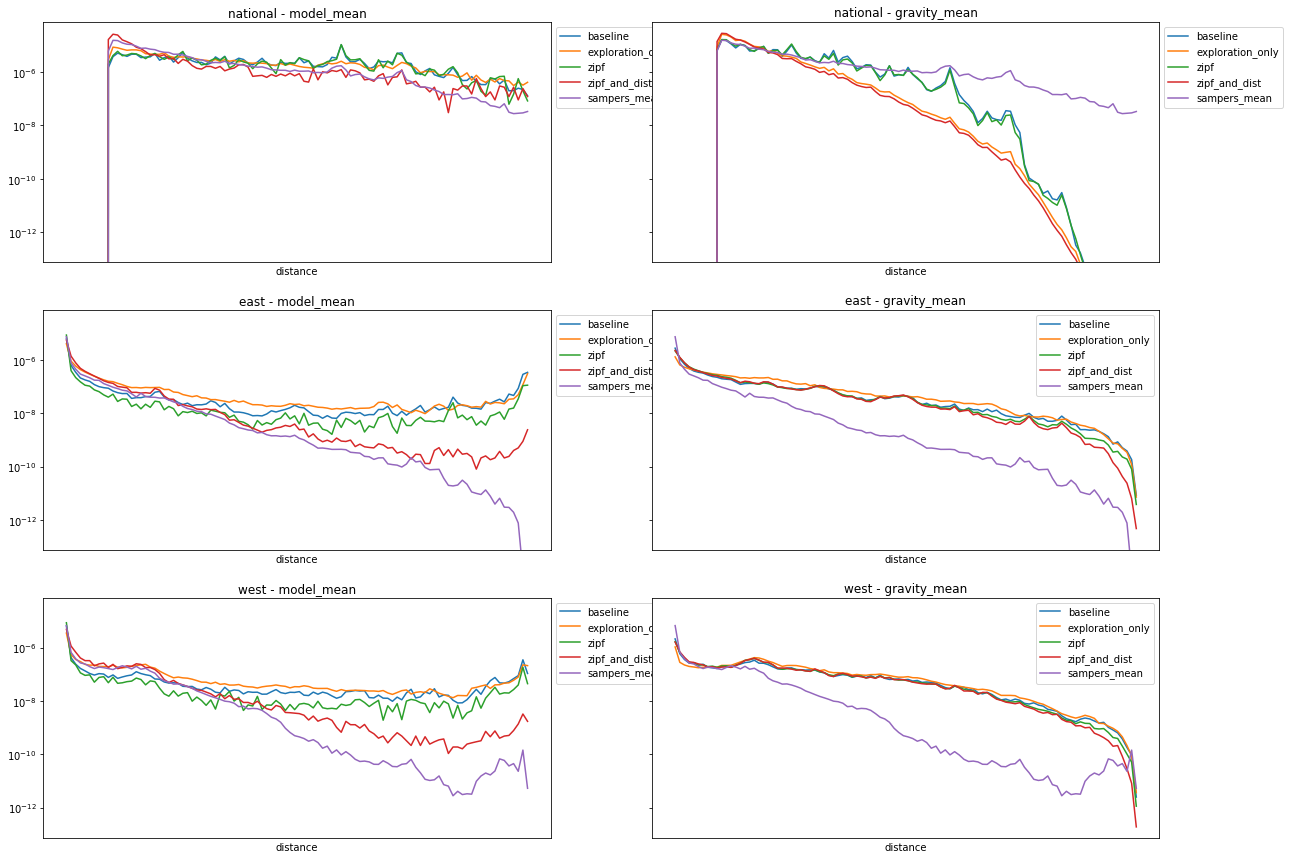

In [17]:
_ = resultcomp.plot_distance_metrics(dms)